# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<br><b>Цели исследования</b>:
1. Найти особенности и зависимости на рынке недвижимости;
2. Создать автоматизированную систему для выявления мошеннической деятельности, ошибок в данных и аномалий;
3. Изучить, как быстро продавались квартиры. Определить какие продажи можно считать быстрыми, а какие — необычно долгими;
4. Выяснить какие факторы больше всего влияют на стоимость объекта;
5. Посчитать медианную цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра;
6. Рассчитать медианную цену каждого километра от квартиры до центра Санкт-Петербурга.

<br><b>Ход исследования</b>:
1. Обзор и изучение данных;
2. Предобработка данных;
3. Добавление новых данных в таблицу;
4. Определение быстрых и долгих продаж;
5. Выявление факторов, которые больше всего влияют на стоимость объекта;
6. Расчёт медианной цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений;
7. Определение населённых пунктов с самой высокой и низкой стоимостью квадратного метра;
8. Вычисление медианной цены каждого километра от квартиры до центра Санкт-Петербурга;
9. Вывод.

## Изучение общей информации о файле 

### Импорт библиотек и изучение данных

In [1]:
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib
import numpy as np # импортируем библиотеку numpy
import pandas as pd # импортируем библиотеку pandas

data = pd.read_csv('real_estate_data.csv',sep='\t')
pd.set_option('display.max_columns', None) # уберём ограничение на вывод столбцов на экран
display(data.head(15)) # выведем 15 строк таблицы на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


По данным видно, что столбцы имеют правильные названия, в некоторых столбцах пропуски, а в столбцах "first_day_exposition", "floors_total", "is_apartment", "balcony", "parks_around3000", "ponds_around3000", "days_exposition" значениям нужно изменить формат.

In [2]:
data.info(verbose=True) # изучим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В dataframe много столбцов с пропусками, также многие столбцы имеют некорректный формат, такие как "first_day_exposition" и "is_apartment".

### Построение гистограмм по числовым столбцам

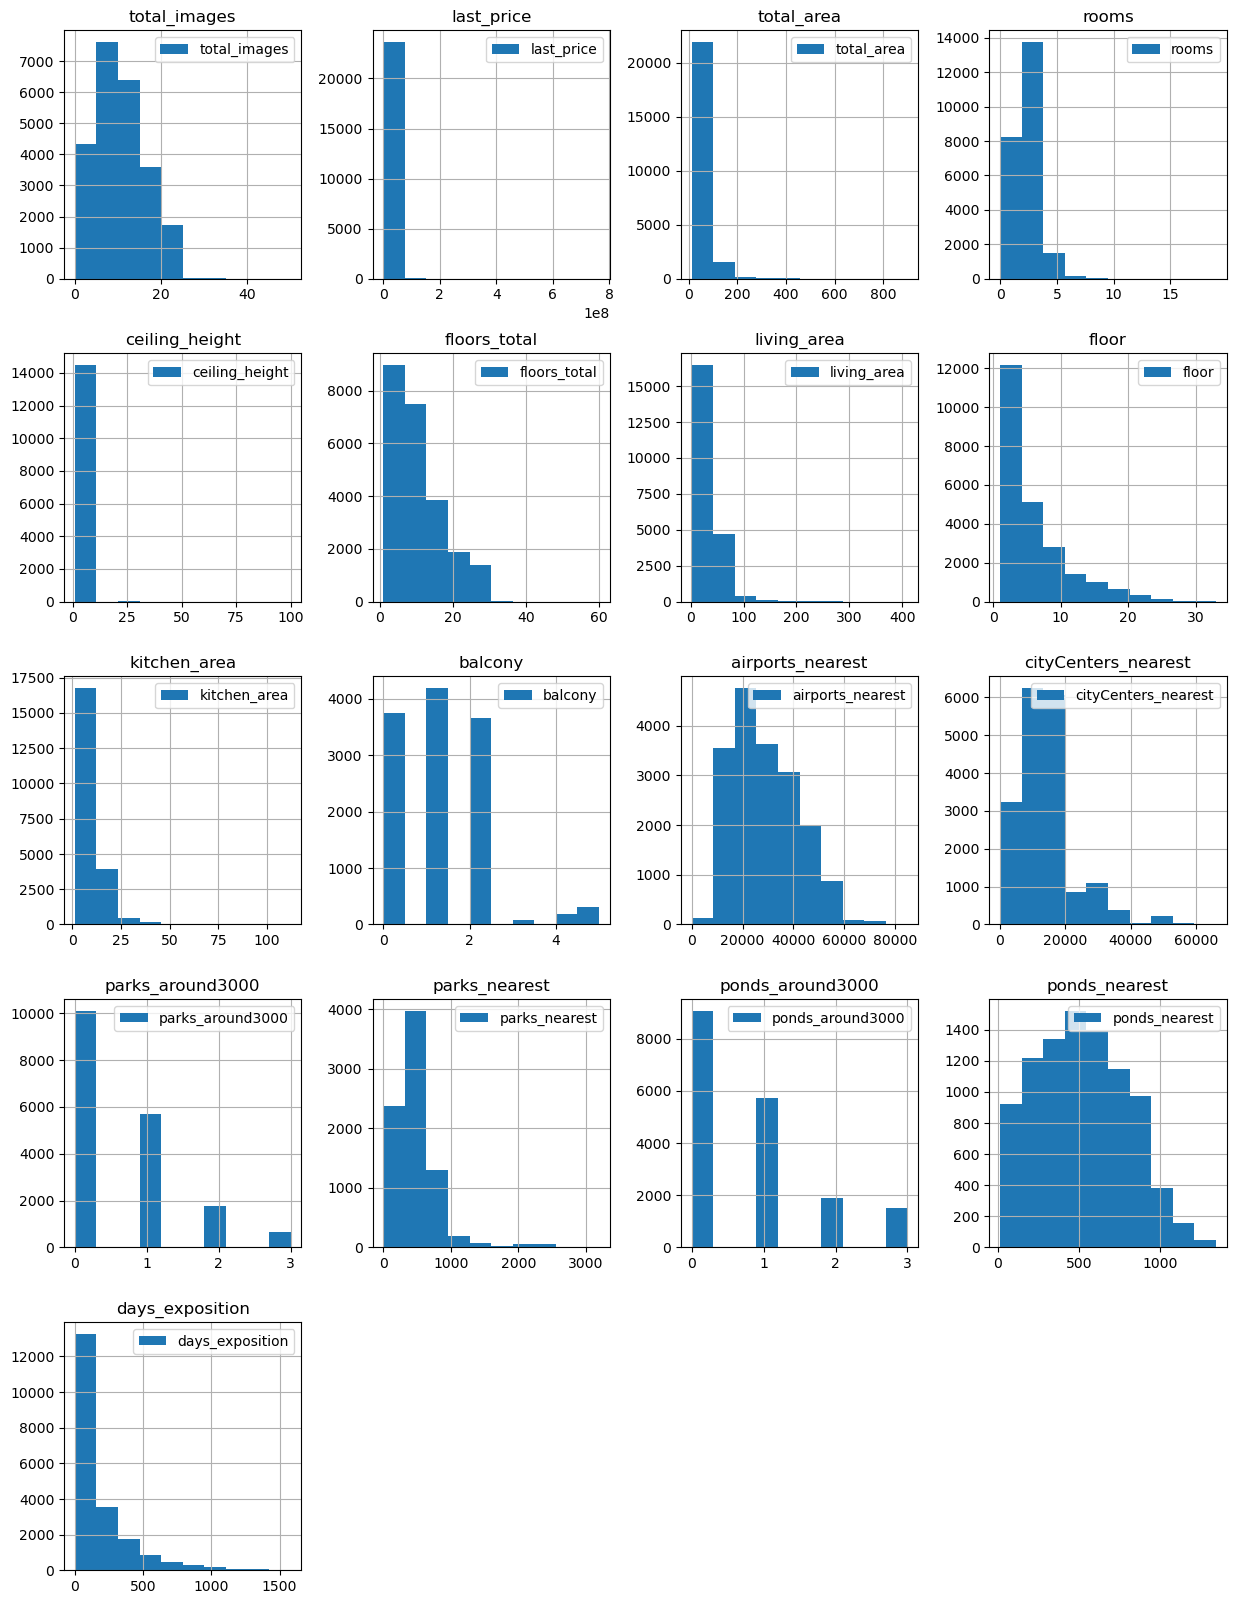

In [3]:
data.hist(figsize=(15, 20), legend=True, grid=True); # построим гистограммы по всем числовым столбцам

Гистограммы выглядят корректными. Большого количества аномальных значений не наблюдается.

Таким образом, были загружены необходимые библиотеки, файл с данными и произведена первичная оценка исследуемых данных.

## Предобработка данных

### Поиск и обработка пропусков

In [4]:
# создадим таблицу для отображения кол-ва пропущенных строк в столбцах
passes_count = data.isna().sum()[lambda x : x!=0]
# создадим таблицу для отображения % пропусков от общего числа строк
passes_procent = pd.DataFrame(data.isna().mean()[lambda x : x!=0]*100)
passes = pd.concat([passes_count, passes_procent], axis=1) # объединим таблицы 'passes_count' и 'passes_procent'

passes.columns = ['passes_count', 'passes_procent'] # переименуем столбцы в таблице
(passes.sort_values(by='passes_count', ascending=False)
       .style.format({'passes_procent': '{:.1f}%'}).background_gradient('coolwarm')
) # поменяем стиль таблицы

,passes_count,passes_procent
is_apartment,20924,88.3%
parks_nearest,15620,65.9%
ponds_nearest,14589,61.6%
balcony,11519,48.6%
ceiling_height,9195,38.8%
airports_nearest,5542,23.4%
cityCenters_nearest,5519,23.3%
parks_around3000,5518,23.3%
ponds_around3000,5518,23.3%
days_exposition,3181,13.4%


Причины, по которым могли появится пропуски в следующих столбцах делятся на 2 типа (1 тип - пользователь не указал данные и 2 тип - технический сбой в системе сбора данных):
1. ceiling_height - 1;
2. floors_total - 1;
3. living_area - 1;
4. is_apartment - 1;
5. kitchen_area - 1;
6. balcony - 1;
7. locality_name - 1;
8. airports_nearest - 2;
9. cityCenters_nearest - 2;
10. parks_around3000 - 2;
11. parks_nearest - 2;
12. ponds_around3000 - 2;
13. ponds_nearest - 2;
14. days_exposition - 2.

Столбцы "ceiling_height", "floors_total", "living_area", "kitchen_area" мы можем заполнить медианными значениями, так как это не исказит результаты исследования.

In [5]:
def fillna_median(data, column):
    ''' 
    создадим функцию, которая заполнит пропуски в заданном столбце
    медианным значением по заданному столбцу
    '''
    data[column] = data[column].fillna(data[column].median())

fillna_median(data, 'ceiling_height') # заполним пустые значения столбца 'ceiling_height' медианным значением
fillna_median(data, 'floors_total') # заполним пустые значения столбца 'floors_total' медианным значением
fillna_median(data, 'living_area') # заполним пустые значения столбца 'living_area' медианным значением
fillna_median(data, 'kitchen_area') # заполним пустые значения столбца 'kitchen_area' медианным значением

Пропуски в столбце "balcony" мы заполним значением 0. Скорее всего, пользователь не указал данные по кол-ву балконов, так как у него отсутствуют балконы.

In [6]:
data['balcony'] = data['balcony'].fillna(0) # заполним пропуски в столбце 'balcony'

Заполним пропуски в столбцах "parks_around3000" и "ponds_around3000", основываясь на значениях в столбцах "parks_nearest" и "ponds_nearest" соответственно.

In [7]:
data[data['parks_nearest'].isna()]['parks_around3000'].value_counts() # проверим какие
# значения у столбца 'parks_around3000' при пропущенных значениях в столбце 'parks_nearest'

0.0    10102
Name: parks_around3000, dtype: int64

In [8]:
data[data['parks_nearest'].isna()]['parks_around3000'].isna().sum() # посмотрим кол-во
# пропущенных значений у столбца 'parks_around3000' при пропущенных значениях в столбце 'parks_nearest'

5518

Получается, когда значение в столбце "parks_nearest" пропущено, то в 10102 случаях в столбце 'parks_around3000' стоит значение 0.
<br> В оставшихся 5518 случаях, когда значение "parks_nearest" пропущено, то значение "parks_around3000" тоже пропущено. 
<br>Значит значение 'parks_around3000' зависит от значения "parks_nearest".

In [9]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) # заполним пропущенные значения
# в столбце 'parks_around3000'

In [10]:
data[data['ponds_nearest'].isna()]['ponds_around3000'].value_counts() # проверим какие
# значения у столбца 'ponds_around3000' при пропущенных значениях в столбце 'ponds_nearest'

0.0    9071
Name: ponds_around3000, dtype: int64

In [11]:
data[data['ponds_nearest'].isna()]['ponds_around3000'].isna().sum() # посмотрим кол-во
# пропущенных значений у столбца 'ponds_around3000' при пропущенных значениях в столбце 'ponds_nearest'

5518

Ситуация с пропущенными значениями в столбце "ponds_around3000" аналогична "parks_around3000".

In [12]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # заполним пропущенные значения
# в столбце 'ponds_around3000'

In [13]:
data.isna().sum()[lambda x : x!=0] # получим список столбцов с пропусками

is_apartment           20924
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_nearest          15620
ponds_nearest          14589
days_exposition         3181
dtype: int64

Пропуски в столбцах "is_apartment" и "locality_name" невозможно заполнить, так как нет данных на основании которых можно это сделать.
Оставшиеся пропуски в данных мы также не можем заполнить, так как они относятся к типу абсолютно случайных и их заполнение, например, медианными значениями приведёт к искажению результатов исследования.

### Изменение типов данных

В следующих столбцах нужно изменить тип данных: 
1. "first_day_exposition" - на datetime64;
2. "floors_total" - на int64;
3. "is_apartment"- на bool;
4. "balcony"- на int64;
5. "parks_around3000"- на int64;
6. "ponds_around3000"- на int64;
7. "days_exposition"- на int64.

In [14]:
# поменяем формат в столбце 'first_day_exposition' на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT')

In [15]:
def to_int(data, column):
    '''
    создадим функцию для преобразования значений в int64
    '''
    data[column] = data[column].astype('int64', errors='ignore')

In [16]:
# создадим list с столбцами для преобразования типов на int64
columns_to_int = ['floors_total', 'balcony', 'parks_around3000',
                  'parks_around3000', 'ponds_around3000',
                  'days_exposition']

for column in columns_to_int: # напишем цикл для автоматизации преборазований типов
    to_int(data, column)

In [17]:
data.info() # проверяем поменялись ли типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Необходимые преобразования типов в данных завершены.

### Поиск и обработка явных и неявных дубликатов

In [18]:
data.duplicated().sum() # поиск явных дубликатов

0

In [19]:
data['locality_name'] = data['locality_name'].str.lower() # приведём значения к нижнему регистру
data['locality_name'].sort_values().unique() # посмотрим уникальные значения по столбцу 'locality_name'

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

In [20]:
def locality_name_replace(data, column, locality_name_list):
    '''
    создадим функцию для замены значения строки в определённым столбце на пустоту
    '''
    for locality_name in locality_name_list:
        data[column] = data[column].str.replace(locality_name, '')

# создадим список значений для замены на пустоту
locality_name_list = ['городской поселок ' , 'поселок городского типа ',
                      'поселок при железнодорожной станции ', 'коттеджный поселок ',
                      'поселок станции ', 'поселок ', 'деревня ',
                      'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'село ']

data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # заменим ё на е, чтобы избежать дубликатов
locality_name_replace(data, 'locality_name', locality_name_list) # применим функцию 'locality_name_replace'

In [21]:
data['locality_name'].sort_values().unique() # посмотрим уникальные значения по столбцу 'locality_name'

array(['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро',
       'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров',
       'бокситогорск', 'большая вруда', 'большая ижора',
       'большая пустомержа', 'большие колпаны', 'большое рейзино',
       'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь',
       'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'вещево',
       'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово',
       'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово',
       'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево',
       'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово',
       'дзержинского', 'дружная горка', 'дружноселье', 'дубровка',
       'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково',
       'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск',
       'зимитицы', 'ивангород', 'извара'

Мы избавились от неявных дубликатов в столбце "locality_name".

### Поиск и обработка аномалий

In [22]:
data.describe() # выведем статистические показатели по данным в таблице на экран

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.667750,34.099892,5.892358,10.428526,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.585961,21.162096,4.885249,5.631126,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.400000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим аномалии в столбце "ceiling_height" минимальная высота потолков 1 м. Высота потолка не может быть ниже 2,4 м, даже учитывая, что в объявлениях могут быть дома старой застройки. 
<br>Также в столбце "ceiling_height" максимальная высота 100м, что тоже является аномальным значением. Максимальную высоту потолков установим на значении 11 м.

Предположим, что в значениях в столбце "ceiling_height", которые больше 11 пользователи ошиблись и поставили, например, вместо 2.5 м значение в 25 м. Разделим эти значения на 10.

In [23]:
mask = data.eval('ceiling_height > 11') # создадим маску с фильтром по столбцу 'ceiling_height'
data.loc[mask, 'ceiling_height'] /= 10 # разделим отфильтрованный столбец 'ceiling_height' на 10

In [24]:
data['ceiling_height'].mask(data['ceiling_height'] < 2.4, np.NaN, inplace=True) # заменим аномально
# низкие значения в столбце 'ceiling_height' на пустоту

Таким образом, мы избавились от аномальных значений в столбце "ceiling_height".

В итоге были выявлены следующие проблемы в данных: пропуски, аномальные значения, неявные дубликаты. Пропуски были заменены, аномальные значения и неявные дубликаты исключены из датафрейма. Также были изменены типы данных в выбранных столбцах.
<br>При дальнейшей работе с данными заказчику стоит проводить предобработку данных, т.е. выявлять и устранять или предотвращать пропуски, аномалии и дубликаты.

## Добавление новых данных в таблицу

### Добавление новых столбцов в таблицу

In [25]:
data['m2_price'] = data['last_price'] / data['total_area'] # добавим столбец 'm2_price'
data['weekday_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday # добавим столбец 'week_day_of_exposition'
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month # добавим столбец 'month_of_exposition'
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year # добавим столбец 'year_of_exposition'
data['distance_to_cityCenters'] = (data['cityCenters_nearest'] / 1000).round() # добавим столбец 'distance_to_cityCenters'

In [26]:
data['floor_temp'] = data['floor'] # создадим временный столбец 'floor_temp'
data.loc[data['floor_temp'] == data['floors_total'], 'floor_temp'] = 'max' # заменим значения в столбце 'floor_temp'
# на 'max' если значения столбцов 'floor_temp' и 'floors_total' равны

In [27]:
def categorize_floor(floor):
    '''
    создадим функцию для присвоения типа этажа по значению из столбца 'floor_temp'
    '''
    try:
        if floor == 1:
            return 'первый'
        elif  floor == 'max':
            return 'последний'
        else:
            return 'другой'
    except:
        pass
data['type_of_floor'] = data['floor_temp'].apply(categorize_floor) # вызовем функцию 'categorize_floor'
del data['floor_temp'] # удалим временный столбец 'floor_temp'

In [28]:
data.head() # посмотрим первые 5 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_price,weekday_of_exposition,month_of_exposition,year_of_exposition,distance_to_cityCenters,type_of_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,16.0,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,False,False,11.0,2,шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,19.0,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,14.0,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,NaN,False,False,9.1,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,7.0,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,8.0,другой


Как видно из таблицы, новые столбцы добавлены корректно.

Новые столбцы хорошо дополняют таблицу и понадобятся для дальнейшего анализа данных.

## Исследовательский анализ данных

### Построение гистограмм и их анализ

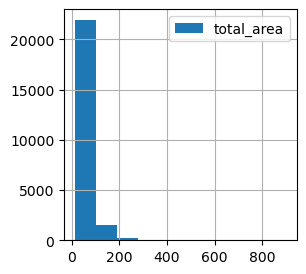

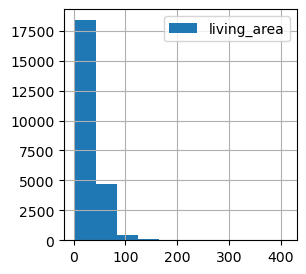

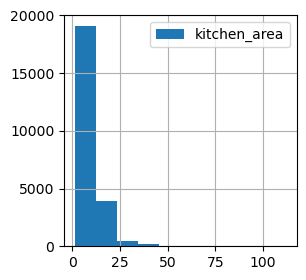

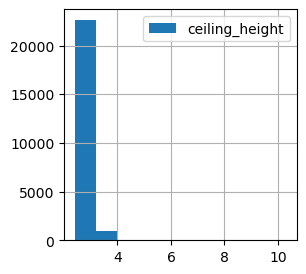

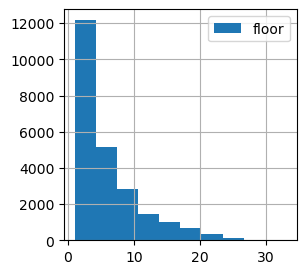

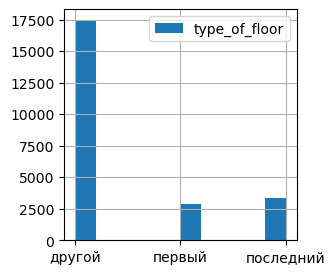

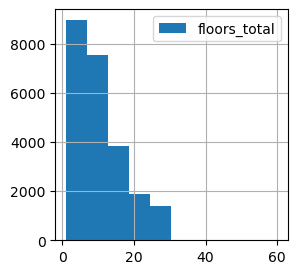

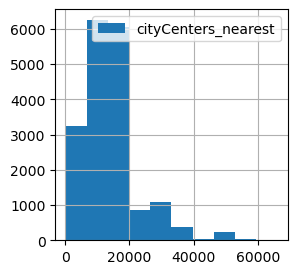

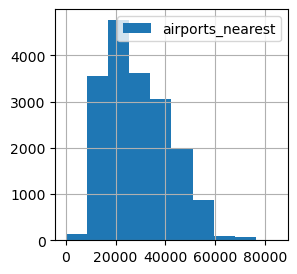

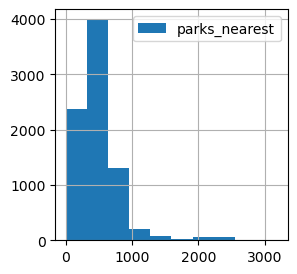

In [29]:
def column_to_hist(data, column_list_to_hist):
    '''
    создадим функцию для построения гистограммы по каждому столбцу из списка
    '''
    for column in column_list_to_hist:
        data[column].hist(figsize=(3, 3), legend=True, grid=True)
        plt.show()

# создадим список с столбцами, по которым нужно построить гистограммы
column_list_to_hist = ['total_area', 'living_area', 'kitchen_area','ceiling_height',
                       'floor', 'type_of_floor', 'floors_total','cityCenters_nearest',
                       'airports_nearest', 'parks_nearest']
column_to_hist(data, column_list_to_hist) # применим фукнцию column_to_hist

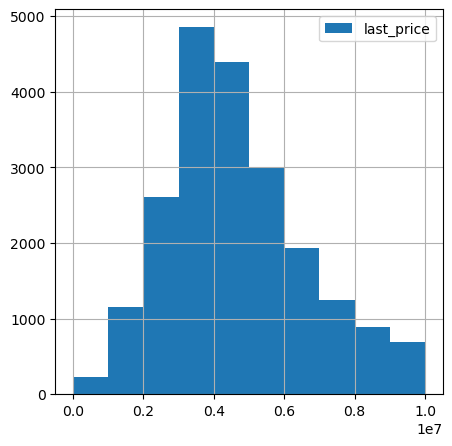

In [30]:
data['last_price'].hist(figsize=(5, 5), legend=True, grid=True,range=(0,10000000)); # построим
# гистограмму по столбцу 'last_price'

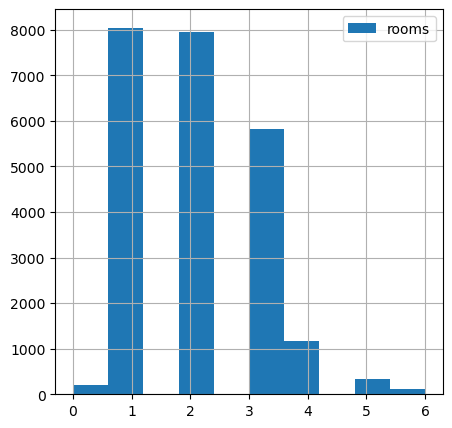

In [31]:
data['rooms'].hist(figsize=(5, 5), legend=True, grid=True,range=(0,6)); # построим
# гистограмму по столбцу 'rooms'

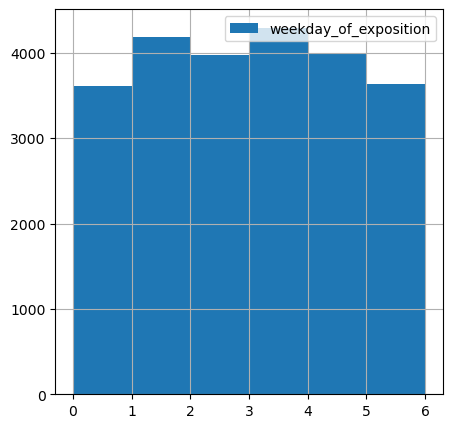

In [32]:
data['weekday_of_exposition'].hist(figsize=(5, 5), legend=True, grid=True, bins=6); # построим
# гистограмму по столбцу 'weekday_of_exposition'

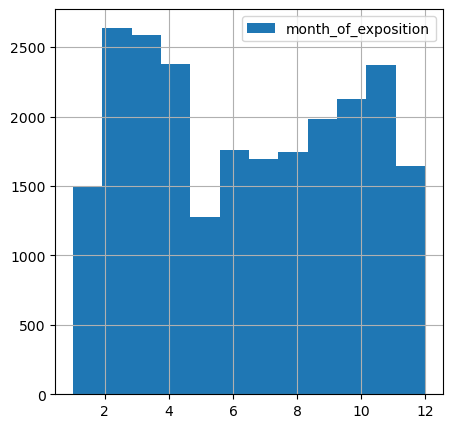

In [33]:
data['month_of_exposition'].hist(figsize=(5, 5), legend=True, grid=True, bins=12); # построим
# гистограмму по столбцу 'month_of_exposition'

Описание гистограмм:
1. "total_area": большинство квартир общей площадью до 100 кв.м.;
2. "living_area": большинство квартир имеют жилую площадь до 50 кв.м.;
3. "kitchen_area": большинство квартир имеют кухню с площадью до 12,5 кв.м.;
4. "last_price": в основном квартиры стоят в диапазоне от 2 до 7 млн.руб.;
5. "room": 1 и 2-х комнатные квартиры встречаюстя наиболее часто;
6. "ceiling_height": большинство квартир с потолками до 3 м;
7. "floor": квартиры не выше 5-го этажа встречаются всех чаще;
8. "type_of_floor": квартиры на первых и последних этажах встречаются редко;
9. "floors_total": квартир в домах, где больше 30-ти этажей практически нет в продаже;
10. "cityCenters_nearest": в основном квартиры продаются в радиусе от 10 до 20 км до центра города;
11. "airports_nearest": вблизи 10 км до аэропорта квартир в продаже практически нет;
12. "parks_nearest": практически у всех квартир есть парк ближе 1 км;
13. "weekday_of_exposition": в целом по дням недели объявления распределены равномерно;
14. "month_of_exposition": наиболее часто выкладывают объявления в феврале, марте, апреле и ноябре.

### Как быстро продавались квартиры?

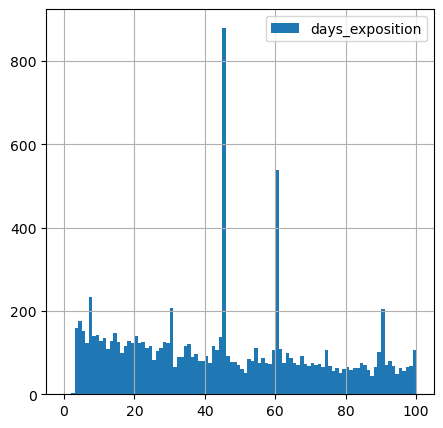

In [34]:
# построим гистограмму по столбцу 'days_exposition'
data['days_exposition'].hist(figsize=(5, 5), legend=True,
                             grid=True, bins=100, range=(0,100));

Из гистограммы видно, что очень большое количество объектов было продано за 45 и 60 дней. Эти аномалии очень похожи на техническую особенность самой платформы: скорее всего, в эти дни платформа автоматически убирает объявление, если пользователь его не продлил.

In [35]:
data['days_exposition'].describe() # выведем статистические показатели по данным
# в столбце 'days_exposition' на экран

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Стандартное отклонение довольно высокое, что означает большой разброс в данных.
<br> Медиана составляет 95 дней - половина объектов продаётся раньше, а другая половина позже.
<br> В среднем объект находится в продаже 180 дней.

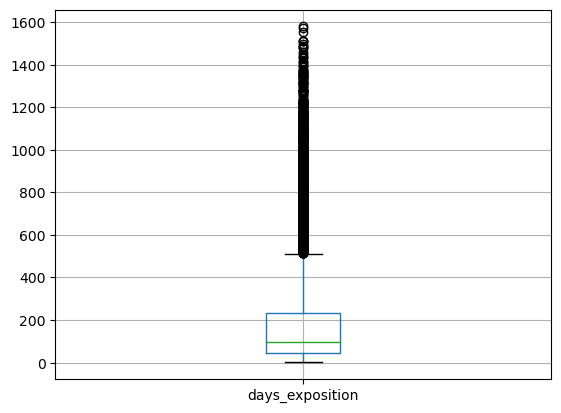

In [36]:
data.boxplot(column='days_exposition'); # построим диаграмму размаха по столбцу 'days_exposition'

По графику видно, что значения больше 500 являются выбросами. Но их не так много, так как медиана не стремится к высоким значениям.

Быстрой продажей можно считать объявление со значением ниже 1-го квартиля, т.е. меньше 45 дней.
<br> Долгой продажей можно считать объявление со значением выше 3-го квартиля, т.е. больше 232 дней.

### Какие факторы больше всего влияют на стоимость объекта?

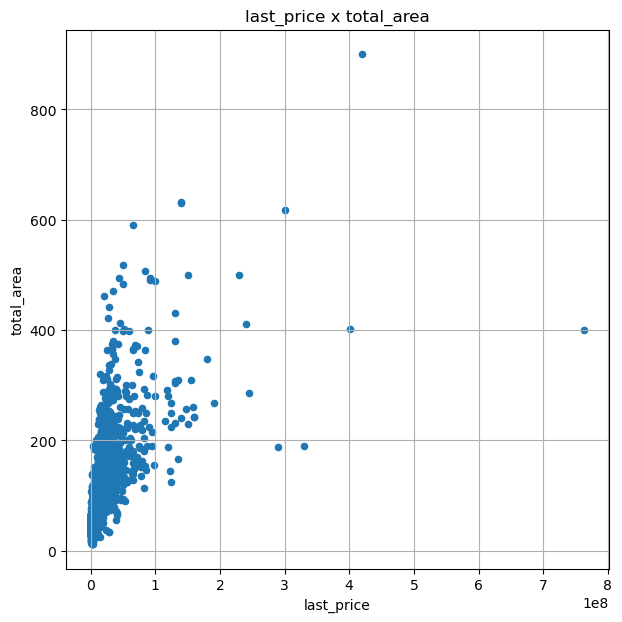

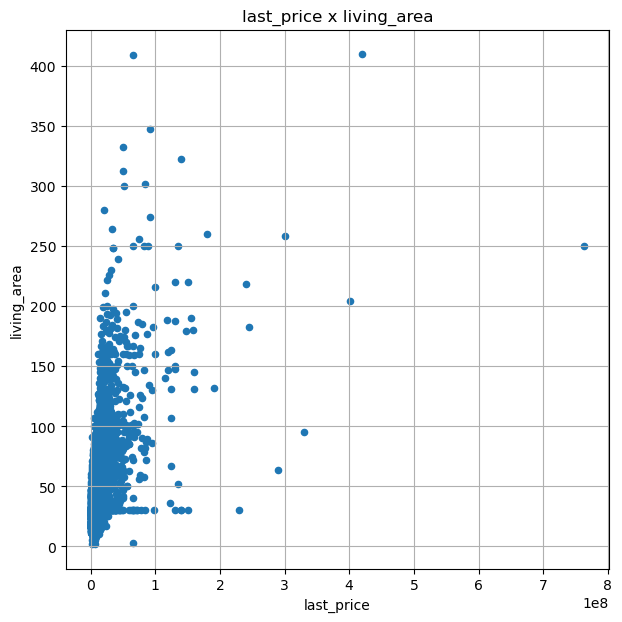

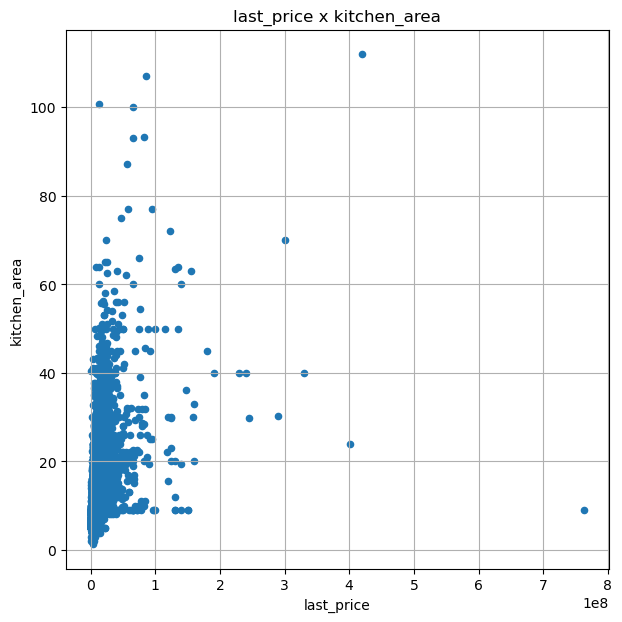

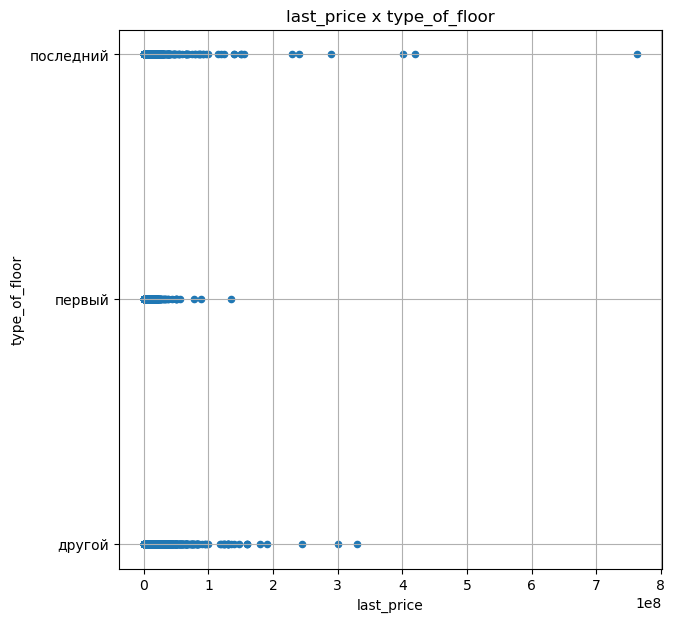

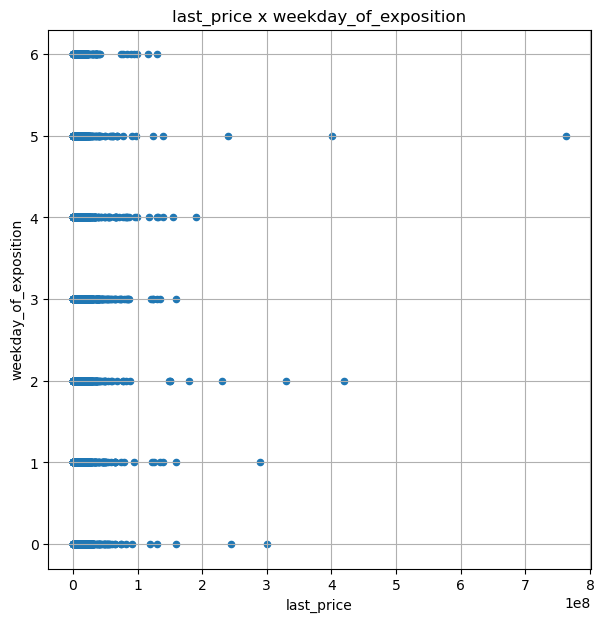

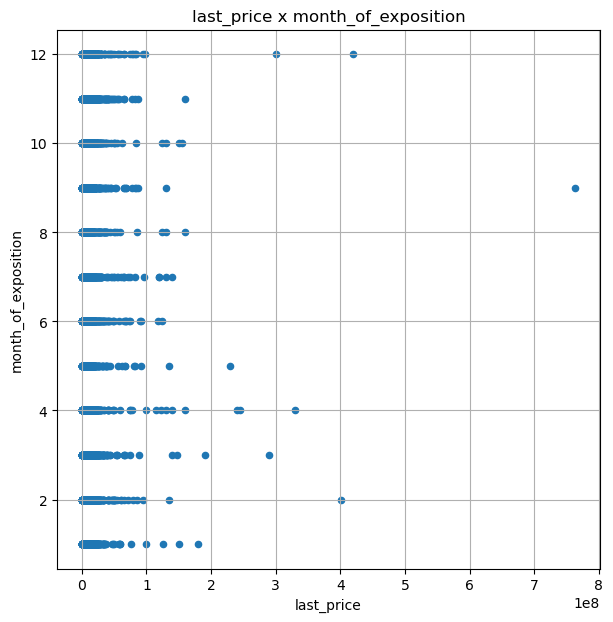

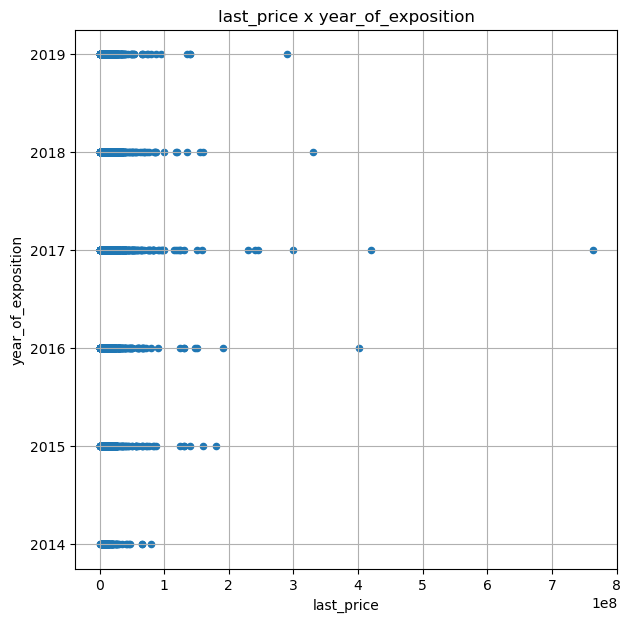

In [37]:
def price_to_scatter(data, column_list_to_scatter):
    '''
    создадим функцию для построения гистограмм по заданному столбцу и столбцу 'last_price'
    '''
    for column in column_list_to_scatter:
        (data.plot(kind='scatter', x='last_price', y=column, figsize=(7,7),
                  grid=True, legend=True, title=f'last_price x {column}')
        )

# создадим список столбцов, по которым нужно построить гистограммы        
column_list_to_scatter = ['total_area', 'living_area', 'kitchen_area',
                          'type_of_floor', 'weekday_of_exposition',
                          'month_of_exposition', 'year_of_exposition']     
price_to_scatter(data, column_list_to_scatter) # применим функцию 'price_to_scatter'

In [38]:
def price_to_corr(data, column_list_to_corr):
    '''
    создадим функцию для расчёта корреляции Пирсона по заданному столбцу и столбцу 'last_price'
    '''
    for column in column_list_to_corr:
        print(f'Корелляция "last_price" с "{column}": {round(data["last_price"].corr(data[column]),3)}')

# создадим список столбцов, по которым нужно рассчитать корреляцию Пирсона        
column_list_to_corr = ['total_area', 'living_area', 'kitchen_area',
                       'weekday_of_exposition', 'month_of_exposition',
                       'year_of_exposition']     
price_to_corr(data, column_list_to_corr) # применим функцию 'price_to_corr'

Корелляция "last_price" с "total_area": 0.654
Корелляция "last_price" с "living_area": 0.541
Корелляция "last_price" с "kitchen_area": 0.44
Корелляция "last_price" с "weekday_of_exposition": 0.002
Корелляция "last_price" с "month_of_exposition": 0.003
Корелляция "last_price" с "year_of_exposition": -0.043


Описание гистограмм:
1. "total_area": видна средняя положительная зависимость, чем больше общая площадь, тем выше цена;
2. "living_area": видна средняя положительная зависимость, чем больше жилая площадь, тем выше цена;
3. "kitchen_area": видна средняя положительная зависимость, чем больше площадь кухни, тем выше цена;
4. "type_of_floor": квартиры первом этаже в основном дешевле, чем на других этажах;
5. "weekday_of_exposition": какой-либо зависимости не наблюдается;
6. "month_of_exposition": какой-либо зависимости не наблюдается;
7. "year_of_exposition": какой-либо зависимости не наблюдается. С 2014 по 2018 год диапазон цен рос каждый год.

В итоге, всех больше на цену кв.м. влияют следующие факторы: "total_area", "living_area", "kitchen_area".


### Медианная цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [39]:
top_10_locality_name = data['locality_name'].value_counts().index[0:10] # создадим series 
# из 10 населённых пунктов с наибольшим количеством объявлений
data_top_10_locality_name = data.loc[data['locality_name'].isin(top_10_locality_name)] # создадим таблицу,
# которая включает только объявления из самых популярных населённых пунктов

In [40]:
data_top_10_locality_name['m2_price'].median() # посчитаем медианную цену 
# одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

100404.31266846361

In [41]:
(data_top_10_locality_name.pivot_table(index='locality_name', values='m2_price',
                                       aggfunc='median')
                          .sort_values(by='m2_price', ascending=False)
) # создадим сводную таблицу по столбцам 'locality_name' и 'm2_price'

,m2_price
locality_name,
санкт-петербург,104761.904762
пушкин,100000.000000
кудрово,95675.473579
парголово,91642.857143
мурино,86175.643522
шушары,76876.172608
колпино,74723.748474
гатчина,67796.610169
всеволожск,65789.473684


Из таблицы видно, что самая высокая медианная цена 1 кв.м. в Санкт-петербурге, а самая низкая в Выборге.

### Медианная цена каждого километра от квартиры до центра Санкт-Петербурга

In [42]:
data_saint_petersburg = data.loc[data['locality_name'] == 'санкт-петербург'] # создадим таблицу,
# которая включает только объявления из Санкт-Петербурга

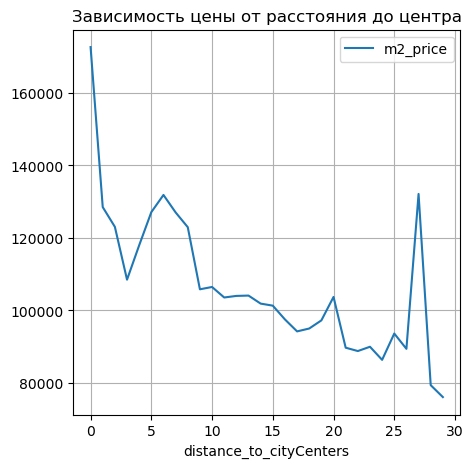

In [43]:
(data_saint_petersburg.pivot_table(index='distance_to_cityCenters',
                                   values='m2_price', aggfunc='median')
                      .plot(figsize=(5,5), grid=True,
                            title = 'Зависимость цены от расстояния до центра')
); # создадим сводную таблицу по столбцам 'distance_to_cityCenters' и 'm2_price' и построим линейный график

По таблице выше можно сделать вывод, что чем дальше квартира от центра, тем стоимость кв.м. меньше.

## Общий вывод

Было проведено исследование архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
<br>Заказчик — компания "Яндекс Недвижимость". Входные данные от компании — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
<br>В итоге были выявлены следующие проблемы в данных: пропуски, аномальные значения, неявные дубликаты. Пропуски были заменены, аномальные значения и неявные дубликаты исключены из датафрейма. Также были изменены типы данных в выбранных столбцах.
<br>При дальнейшей работе с данными заказчику стоит проводить предобработку данных, т.е. выявлять и устранять или предотвращать пропуски, аномалии и дубликаты.
<br>Кроме того, были добавлены новые столбцы, например, стоимость кв.м. для проведения дополнительного анализа данных.

<br>В качестве особенностей и зависимостей, которые существуют на рынке недвижимости, можно выделить следующие:
1. Чем больше общая площадь, жилая площадь или площадь кухни, тем выше цена квартиры;
2. Наиболее часто выкладывают объявления в феврале, марте, апреле и ноябре;
3. Практически у всех квартир есть парк ближе 1 км;
4. В основном квартиры продаются в радиусе от 10 до 20 км до центра города.

<br>Проведён анализ в результате которого были сформулированы следующие выводы:
1. Медианная цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений составляет 104 тыс.руб. за кв.м;
2. Самая высокая медианная цена за 1 кв.м. 104,8 тыс.руб. в Санкт-петербурге, а самая низкая 58,2 тыс.руб. в Выборге среди 10 населённых пунктов с наибольшим числом объявлений;
3. В Санкт-Петербурге выявлена такая тенденция - чем дальше квартира от центра, тем стоимость кв.м. меньше.